In [36]:
from snakemake.io import expand
import pandas as pd
import yaml
import pdb
import re
import numpy as np
import pyranges as pr
import cerberus
from utils import *

In [19]:
config_file = 'config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [20]:
ab = expand(config['data']['cerb']['agg_ab'], zip, species='human')[0]

In [21]:
df = pd.read_csv(ab, sep='\t')

In [22]:
df.head()

,annot_transcript_id,annot_transcript_name,Brain_Adult_ont_post-capture_human_all,Brain_Adult_ont_pre-capture_human_all,Brain_Adult_pacBioSII_post-capture_human_all,Brain_Adult_pacBioSII_pre-capture_human_all,Brain_Embryo_ont_post-capture_human_all,Brain_Embryo_ont_pre-capture_human_all,Brain_Embryo_pacBioSII_post-capture_human_all,Brain_Embryo_pacBioSII_pre-capture_human_all,...,TpoolA_Adult_pacBioSII_post-capture_human_all,TpoolA_Adult_pacBioSII_pre-capture_human_all,WBlood_Adult_ont_post-capture_human_all,WBlood_Adult_ont_pre-capture_human_all,WBlood_Adult_pacBioSII_post-capture_human_all,WBlood_Adult_pacBioSII_pre-capture_human_all,iPSC_Embryo_ont_post-capture_human_all,iPSC_Embryo_ont_pre-capture_human_all,iPSC_Embryo_pacBioSII_post-capture_human_all,iPSC_Embryo_pacBioSII_pre-capture_human_all
0,"ENSG00000002822[21,24,1]","MAD1L1[21,24,1]",9.92513,NaN,NaN,NaN,32.573576,NaN,NaN,NaN,...,NaN,NaN,13.869603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"ENSG00000005022[4,5,1]","SLC25A5[4,5,1]",9.92513,NaN,4.715634,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ENSG00000005075[2,2,3]","POLR2J[2,2,3]",9.92513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ENSG00000005075[3,3,2]","POLR2J[3,3,2]",9.92513,16.602442,NaN,NaN,24.430182,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ENSG00000005075[3,4,2]","POLR2J[3,4,2]",19.85026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = df.fillna(0)

In [24]:
df.annot_transcript_id.tolist()[:5]

['ENSG00000002822[21,24,1]',
 'ENSG00000005022[4,5,1]',
 'ENSG00000005075[2,2,3]',
 'ENSG00000005075[3,3,2]',
 'ENSG00000005075[3,4,2]']

In [25]:
# how many transcripts have multiple genes assigned to
df['gene_count'] = df.annot_transcript_id.str.count('ENSG')

In [27]:
df.loc[df.gene_count==0]

,annot_transcript_id,annot_transcript_name,Brain_Adult_ont_post-capture_human_all,Brain_Adult_ont_pre-capture_human_all,Brain_Adult_pacBioSII_post-capture_human_all,Brain_Adult_pacBioSII_pre-capture_human_all,Brain_Embryo_ont_post-capture_human_all,Brain_Embryo_ont_pre-capture_human_all,Brain_Embryo_pacBioSII_post-capture_human_all,Brain_Embryo_pacBioSII_pre-capture_human_all,...,TpoolA_Adult_pacBioSII_pre-capture_human_all,WBlood_Adult_ont_post-capture_human_all,WBlood_Adult_ont_pre-capture_human_all,WBlood_Adult_pacBioSII_post-capture_human_all,WBlood_Adult_pacBioSII_pre-capture_human_all,iPSC_Embryo_ont_post-capture_human_all,iPSC_Embryo_ont_pre-capture_human_all,iPSC_Embryo_pacBioSII_post-capture_human_all,iPSC_Embryo_pacBioSII_pre-capture_human_all,gene_count
2324,"novelGene_1000[1,1,1]","novelGene_1000[1,1,1]",44.663085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2325,"novelGene_1001[1,1,1]","novelGene_1001[1,1,1]",9.925130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2326,"novelGene_1002[1,1,1]","novelGene_1002[1,1,1]",9.925130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2327,"novelGene_1003[1,1,1]","novelGene_1003[1,1,1]",9.925130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2328,"novelGene_1004[1,1,1]","novelGene_1004[1,1,1]",14.887695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125218,"novelGene_96[45,8,44]","novelGene_96[45,8,44]",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.503918,0
125219,"novelGene_97[43,40,43]","novelGene_97[43,40,43]",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.503918,0
125220,"novelGene_98[44,10,44]","novelGene_98[44,10,44]",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.503918,0
125221,"novelGene_99[45,35,45]","novelGene_99[45,35,45]",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.503918,0


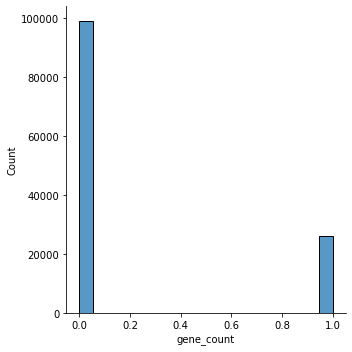

In [26]:
import seaborn as sns
sns.displot(data=df, x='gene_count')

In [16]:
print(len(df.loc[df.gene_count>1].index))
print(len(df.index))

64569
643737


In [17]:
64569/643737

0.10030338476738171

In [29]:
# for each sample, need a list of transcripts that are expressed
min_tpm = 1
df.set_index(['annot_transcript_id', 'annot_transcript_name'], inplace=True)
df = df >= min_tpm

In [30]:
df.head()

,,Brain_Adult_ont_post-capture_human_all,Brain_Adult_ont_pre-capture_human_all,Brain_Adult_pacBioSII_post-capture_human_all,Brain_Adult_pacBioSII_pre-capture_human_all,Brain_Embryo_ont_post-capture_human_all,Brain_Embryo_ont_pre-capture_human_all,Brain_Embryo_pacBioSII_post-capture_human_all,Brain_Embryo_pacBioSII_pre-capture_human_all,CpoolA_Adult_ont_post-capture_human_all,CpoolA_Adult_ont_pre-capture_human_all,...,TpoolA_Adult_pacBioSII_pre-capture_human_all,WBlood_Adult_ont_post-capture_human_all,WBlood_Adult_ont_pre-capture_human_all,WBlood_Adult_pacBioSII_post-capture_human_all,WBlood_Adult_pacBioSII_pre-capture_human_all,iPSC_Embryo_ont_post-capture_human_all,iPSC_Embryo_ont_pre-capture_human_all,iPSC_Embryo_pacBioSII_post-capture_human_all,iPSC_Embryo_pacBioSII_pre-capture_human_all,gene_count
annot_transcript_id,annot_transcript_name,,,,,,,,,,,,,,,,,,,,,
"ENSG00000002822[21,24,1]","MAD1L1[21,24,1]",True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
"ENSG00000005022[4,5,1]","SLC25A5[4,5,1]",True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
"ENSG00000005075[2,2,3]","POLR2J[2,2,3]",True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
"ENSG00000005075[3,3,2]","POLR2J[3,3,2]",True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
"ENSG00000005075[3,4,2]","POLR2J[3,4,2]",True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
ca = cerberus.read(h5)

In [35]:
for c in df.columns.tolist():
    # print(len(df.index))
    # print(len(df.loc[df[c] == True].index))
    # break
    temp = df.loc[df[c] == True].copy(deep=True)
    temp.reset_index(inplace=True)
    tids = temp.annot_transcript_id.tolist()
    df = ca.get_subset_triplets(tids, 'obs_det', sg=sg)
    ca.add_triplets(df)


8660
